In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

## Equations to solve
---
The Hubble parameter for a universe populated with superfluid dark matter evolves as <br>
<div align="center">
    $\dot{h}(\tau) = -\frac{3}{2} h^2 \left(\tau \right) + \frac{3}{2}\cos^2 \left(\tau / 10 \right)$<br>
</div>
where $h$ is a dimensionless Hubble parameter <br>
<div align="center">
    $h(\tau) \equiv H(\tau) / H_0$ <br>
</div>
and $\tau$ is a dimensionless time value <br>
<div align="center">
    $\tau \equiv t / H_0$. <br>
</div>
The Hubble parameter in $\Lambda$CDM meanwhile is <br>
<div align="center">
    $H(a) / H_0 = \sqrt{(\Omega_b + \Omega_m) \left(a / a_0 \right)^{-3} + \Omega_r \left(a / a_0 \right)^{-4} + \Omega_\Lambda}$.
</div>

In [2]:
def sfdm_h(h, t): return (-3.0/2.0)*h**2.0 + (3.0/2.0)*np.cos(.1*t)**2.0

def ΛCDM_h(a): return np.sqrt((Ωb + Ωm)*(a/SCALE_FACTOR)**-3.0 + Ωr*(a/SCALE_FACTOR)**-4.0 + ΩΛ)

ΛCDM_integrand = lambda x : 1.0/(x*ΛCDM_h(x))

In [36]:
# Density parameter in late-time ΛCDM:
#  baryonic, dark matter, radiation, dark energy
Ωb = 0.0
Ωm = .01
Ωr = 0.0
ΩΛ = 1.0 - Ωb - Ωm - Ωr

τ_START_TIME = .01
τ_END_TIME = 10.0
GRID_SIZE  = 1000

# Scale factor "today": in the future, it will be 0 < a0 < 1
SCALE_FACTOR = .00027

REDSHIFT_START = 282000
REDSHIFT_OBSERVATION = 0

In [37]:
ΛCDM_redshifts = np.linspace(REDSHIFT_START,
                            REDSHIFT_OBSERVATION,
                            GRID_SIZE)

ΛCDM_scale_factors = [1.0/(1.0 + ΛCDM_redshifts[i]) for i in range(GRID_SIZE)]
ΛCDM_hubble = [ΛCDM_h(ΛCDM_scale_factors[i]) for i in range(GRID_SIZE)]


τ_time_values = np.linspace(τ_START_TIME, τ_END_TIME, GRID_SIZE, endpoint=True)
sfdm_h_init = ΛCDM_hubble[0]
sfdm_sol = integrate.odeint(sfdm_h, sfdm_h_init, τ_time_values)


cosmic_time = [integrate.quad(ΛCDM_integrand, 0, 1.0/(1.0 + ΛCDM_redshifts[i]))[0] for i in range(GRID_SIZE)]

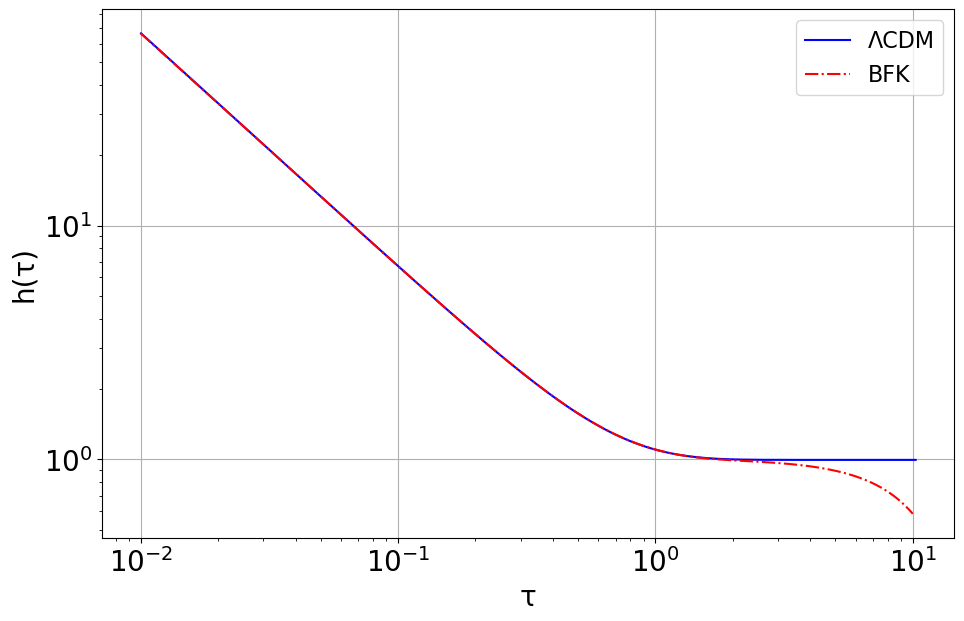

In [38]:
plt.figure(figsize=(11, 7), dpi=100)
plt.plot(cosmic_time, ΛCDM_hubble, 'b', label='ΛCDM')
plt.plot(τ_time_values, sfdm_sol, 'r-.', label='BFK')

plt.xlabel('τ', fontsize=20)
plt.ylabel('h(τ)', fontsize=20)

plt.tick_params(labelsize=20)

plt.xscale('log')
plt.yscale('log')

plt.grid()
plt.legend(loc='best', prop={'size':16})

#plt.savefig('BB_LCDM_Hubble_Paras', dpi = 100)
plt.show()